In [1]:
import pyforest

In [2]:
df = pd.read_csv('Mall_Customers.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.rename(columns={'Annual Income (k$)':'TotalIncome(1000$)','Spending Score (1-100)':'SpendingRate'},inplace=True)
df.head()

,CustomerID,Gender,Age,TotalIncome(1000$),SpendingRate
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<IPython.core.display.Javascript object>

F:\ana\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


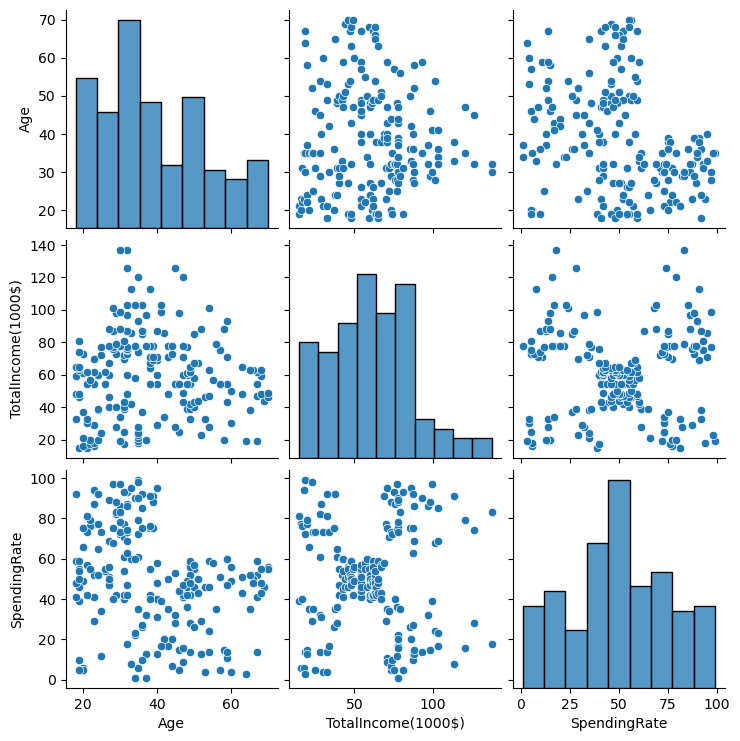

In [8]:
sns.pairplot(df[['Age','TotalIncome(1000$)','SpendingRate']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Total Income vs Spending Rate')

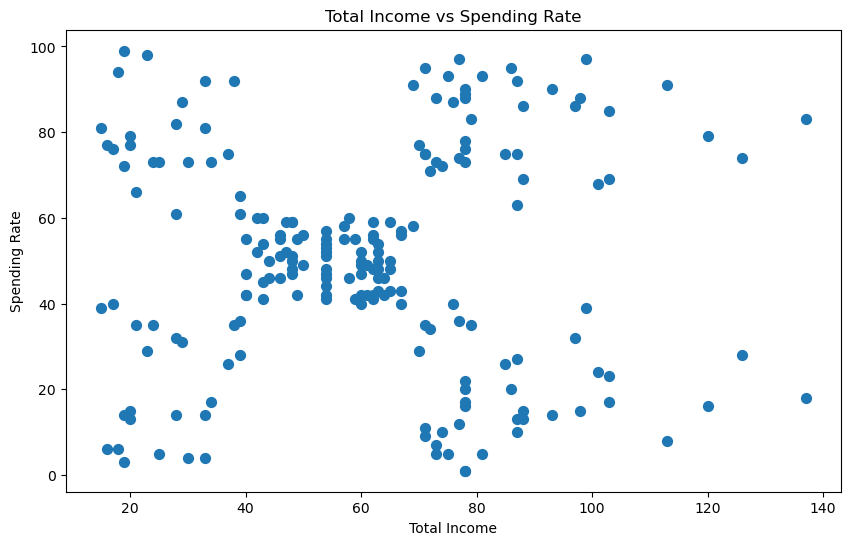

In [9]:
plt.figure(figsize =(10,6))
plt.scatter(df['TotalIncome(1000$)'],df['SpendingRate'], s=50)
plt.xlabel('Total Income')
plt.ylabel('Spending Rate')
plt.title('Total Income vs Spending Rate')

In [15]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans

X = df[['TotalIncome(1000$)','SpendingRate']]

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init =10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Elbow method to determine optimal N of cluster')

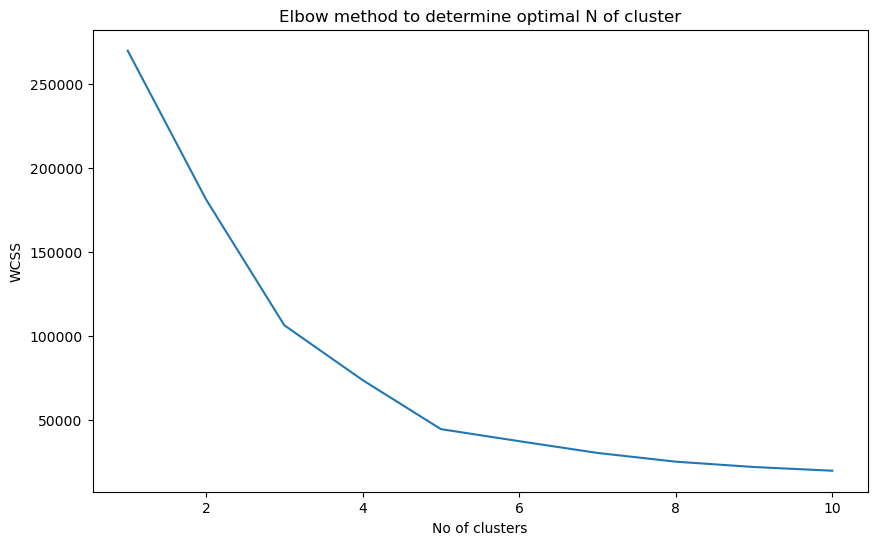

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of cluster')

In [17]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',max_iter=300,n_init =10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [32]:
df['clusters'] =y_kmeans

In [31]:

df.head()

,CustomerID,Gender,Age,TotalIncome(1000$),SpendingRate,clusters,cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,4
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,4,4
4,5,Female,31,17,40,3,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Customer Segment')

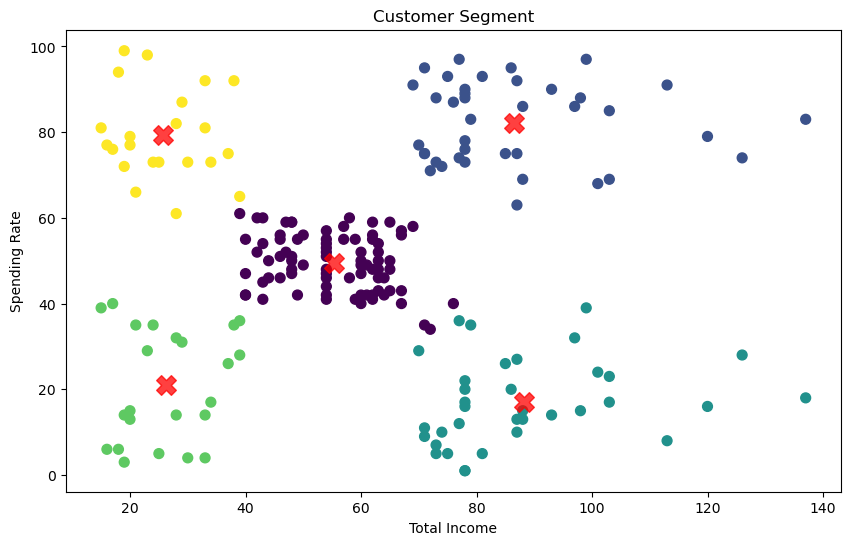

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_kmeans,s=50,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha =0.75,marker='X')
plt.xlabel('Total Income')
plt.ylabel('Spending Rate')
plt.title('Customer Segment')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age vs Spending Rate')

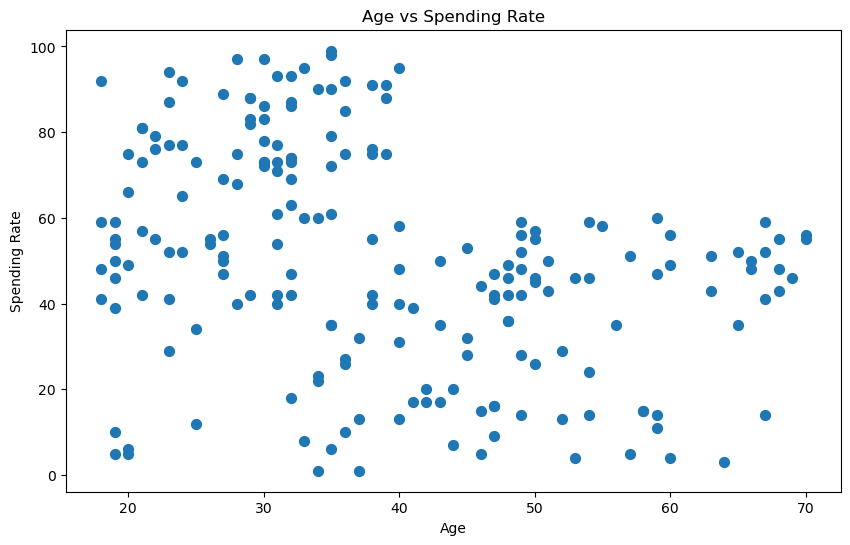

In [26]:
plt.figure(figsize =(10,6))
plt.scatter(df['Age'],df['SpendingRate'], s=50)
plt.xlabel('Age')
plt.ylabel('Spending Rate')
plt.title('Age vs Spending Rate')

In [28]:
X = df[['Age','SpendingRate']]

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init =10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Elbow method to determine optimal N of cluster')

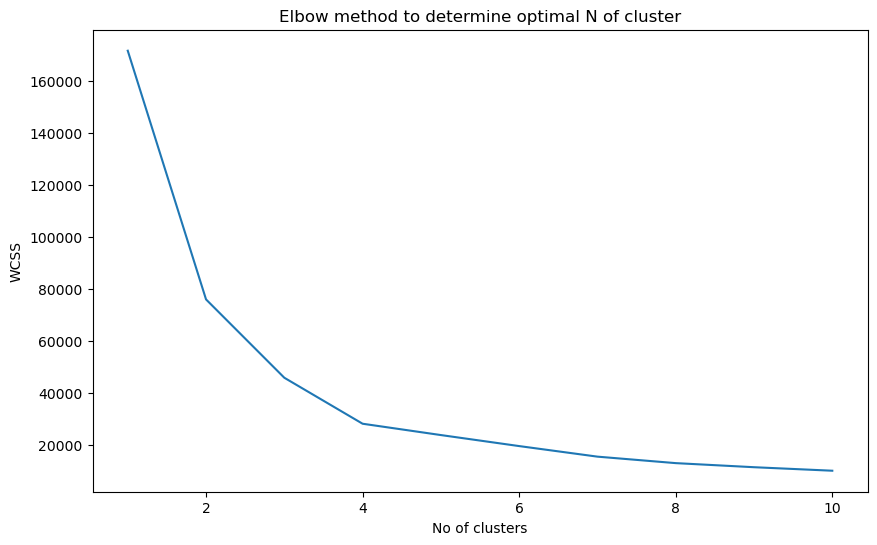

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of cluster')

In [39]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++',max_iter=300,n_init =10,random_state=0)
y_kmeans = kmeans.fit_predict(X)
df['clustersAge'] =y_kmeans

In [40]:
df.head()

,CustomerID,Gender,Age,TotalIncome(1000$),SpendingRate,clusters,clustersAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


In [37]:
df.head()

,CustomerID,Gender,Age,TotalIncome(1000$),SpendingRate,clusters,clustersAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,2
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,4,2
4,5,Female,31,17,40,3,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Customer Segment')

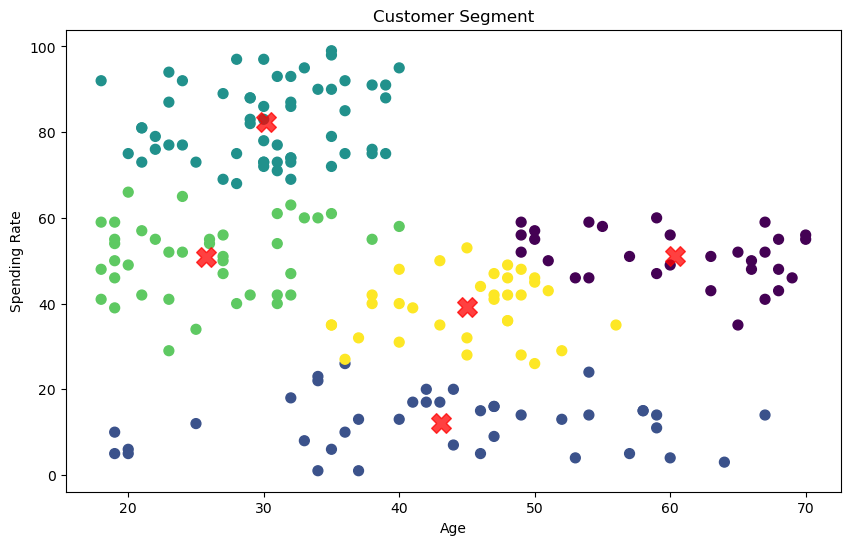

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_kmeans,s=50,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha =0.75,marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Rate')
plt.title('Customer Segment')